In [1]:
from tqdm import tqdm
import pandas as pd 
import numpy as np 
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler
import heartpy as hp
from pre_processing import filter_signal, pre_process, check_R
from full_waveform_statistics import full_waveform_statistics, wavelet_statistics
from full_Goodfellow_preprocess import pre_process

In [25]:
df_X_train = pd.read_csv("data/X_train.csv", index_col="id")
df_Y_train = pd.read_csv("data/Y_train.csv", index_col="id")

In [2]:
df_X_test = pd.read_csv("data/X_test.csv", index_col="id")

In [23]:
id = 3397 #4465 #4241 #126 #5085
signal = df_X_train.iloc[id,:].dropna()
freq = 300.0 #Hz
filter_bandwidth =[3, 45]

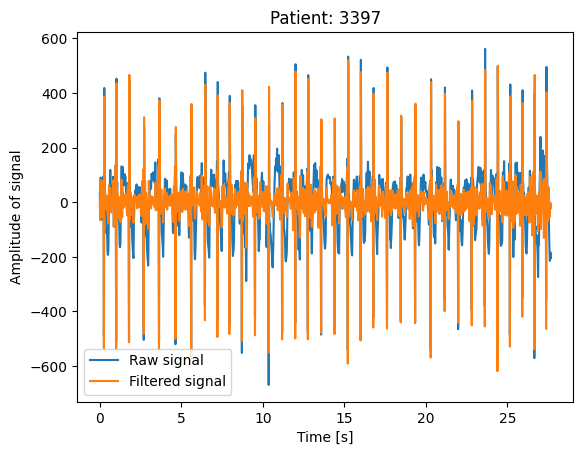

In [24]:
sig_flt= filter_signal(signal=signal,
                          bandwidth=filter_bandwidth,
                          freq=freq)

plt.plot(np.arange(len(signal))/freq, signal, label = "Raw signal")
plt.plot(np.arange(len(sig_flt))/freq, sig_flt, label = "Filtered signal")
plt.title(f'Patient: {id}')
plt.xlabel('Time [s]')
plt.ylabel('Amplitude of signal')
plt.legend()
plt.show()

In [10]:
fw_stats = full_waveform_statistics(sig_flt)
fw_stats
fw=pd.DataFrame(fw_stats, index = [id])
fw

,min,max,mean,median,std,skew,kurtosis,duration
1,-236.450438,499.718529,1.105763,-1.815484,52.932462,1.682371,12.289829,28.51


In [16]:
fw_stats = full_waveform_statistics(sig_flt)
fw.append(fw_stats, ignore_index=True)

/var/folders/kq/q0vtjn8s5x16ts2p5gr_wzb40000gn/T/ipykernel_2216/2125110585.py:2: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  fw.append(fw_stats, ignore_index=True)


,min,max,mean,median,std,skew,kurtosis,duration
0,-236.450438,499.718529,1.105763,-1.815484,52.932462,1.682371,12.289829,28.510000
1,-651.200346,767.854756,-0.806814,-8.279228,173.805167,0.563132,5.655013,29.056667


In [ ]:
wavelet_stats = wavelet_statistics(signal=sig_flt)
wavelet_stats

In [26]:
freq = 300.0 #Hz
filter_bandwidth =[3, 45]
fw=None
wl=None
for id in tqdm(df_X_train.index):
    signal = df_X_train.loc[id,:].dropna()
    #signal_flt= filter_signal(signal=signal, bandwidth=filter_bandwidth, freq=freq)
    signal_flt= pre_process(signal)
    fw_stats = full_waveform_statistics(signal=signal_flt)
    wavelet_stats = wavelet_statistics(signal=signal_flt)
    
    fw_tmp=pd.DataFrame(fw_stats, index = [id])
    fw = pd.concat((fw,fw_tmp),axis=0)
    wl_tmp=pd.DataFrame(wavelet_stats, index = [id])
    wl = pd.concat((wl,wl_tmp),axis=0)
    

100%|██████████| 5117/5117 [04:06<00:00, 20.80it/s]


In [27]:
fw

,min,max,mean,median,std,skew,kurtosis,duration
0,-147.727486,524.938586,0.367809,-6.413898,73.787093,3.358216,16.263312,54.406667
1,-236.450438,499.718529,1.105763,-1.815484,52.932462,1.682371,12.289829,28.510000
2,-474.103741,905.350521,0.645396,-1.802651,122.684873,3.581977,24.002960,27.416667
3,-651.200346,767.854756,-0.806814,-8.279228,173.805167,0.563132,5.655013,29.056667
4,-529.232741,449.825432,0.737186,4.638381,89.570203,0.255455,9.943259,28.206667
...,...,...,...,...,...,...,...,...
5112,-762.608087,922.399046,-0.751774,-6.863628,165.594681,0.570397,4.772801,17.233333
5113,-153.307730,437.011226,0.299741,-0.290427,59.293059,3.725585,20.702050,27.540000
5114,-429.832888,888.556798,-0.111125,-6.460555,121.608261,2.949088,16.725814,28.246667
5115,-186.676951,313.847981,0.391920,-1.747323,45.258519,3.103013,16.261001,27.800000


In [28]:
wl

,swt_d_1_low_power_ratio,swt_d_1_med_power_ratio,swt_d_1_high_power_ratio,swt_d_1_energy_entropy,swt_d_1_higuchi_fractal,swt_a_1_low_power_ratio,swt_a_1_med_power_ratio,swt_a_1_high_power_ratio,swt_a_1_energy_entropy,swt_a_1_higuchi_fractal,...,swt_d_4_low_power_ratio,swt_d_4_med_power_ratio,swt_d_4_high_power_ratio,swt_d_4_energy_entropy,swt_d_4_higuchi_fractal,swt_a_4_low_power_ratio,swt_a_4_med_power_ratio,swt_a_4_high_power_ratio,swt_a_4_energy_entropy,swt_a_4_higuchi_fractal
0,0.368985,0.161593,1.381937,51179.174467,1.127806,0.314623,0.799190,1.062218,59814.324044,1.038683,...,0.680551,0.172338,0.097116,-26345.712576,1.820840,0.300170,0.144390,0.231405,45902.776596,1.139229
1,0.449939,0.138778,1.380733,25222.469090,1.129779,0.256870,0.704976,1.054624,29729.153815,1.036933,...,0.691698,0.116073,0.089433,-15261.536426,1.817175,0.291270,0.111856,0.198190,22756.487667,1.137020
2,0.533277,0.132711,1.400786,22283.385071,1.141883,0.245222,0.697159,1.081647,28570.085586,1.032877,...,0.803366,0.150440,0.111365,-17426.202815,1.748944,0.256035,0.086735,0.263728,21149.501419,1.178251
3,0.534189,0.148048,1.382787,35974.552844,1.134885,0.264373,0.737188,1.154523,37952.258499,1.043161,...,0.813152,0.105988,0.173016,-10265.741007,1.601896,0.298603,0.118332,0.368453,30202.198080,1.151808
4,0.643301,0.128920,1.400724,30080.632104,1.142284,0.309644,0.814063,1.086249,32417.359849,1.047257,...,0.861282,0.141045,0.104116,-12679.602497,1.757937,0.356849,0.085376,0.255634,25373.980278,1.178697
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5112,0.363455,0.147425,1.340229,22185.787038,1.142711,0.261734,0.584870,1.097616,22991.953254,1.041069,...,0.579930,0.113778,0.116201,-2940.199762,1.741480,0.262318,0.114099,0.301281,19700.340536,1.157240
5113,0.636164,0.164077,1.393765,23360.429556,1.124411,0.234280,0.800941,1.073561,26506.117786,1.048044,...,0.875190,0.149100,0.103029,-15973.658822,1.776992,0.309091,0.153743,0.247806,19975.860744,1.150032
5114,0.466811,0.129061,1.390467,27939.753677,1.137581,0.267582,0.682473,1.090944,32508.982958,1.037300,...,0.725655,0.132013,0.100358,-13763.746752,1.762702,0.303648,0.093301,0.250694,24827.641003,1.150989
5115,0.518065,0.147617,1.437284,21119.414074,1.133367,0.281352,0.800802,1.124214,25421.094834,1.036368,...,0.850253,0.115506,0.103369,-18910.665887,1.738559,0.286835,0.126006,0.269492,18529.532970,1.147061


In [29]:
full_waveform_features = pd.concat((fw,wl),axis=1)
full_waveform_features.to_csv("data/full_waveform_features.csv")

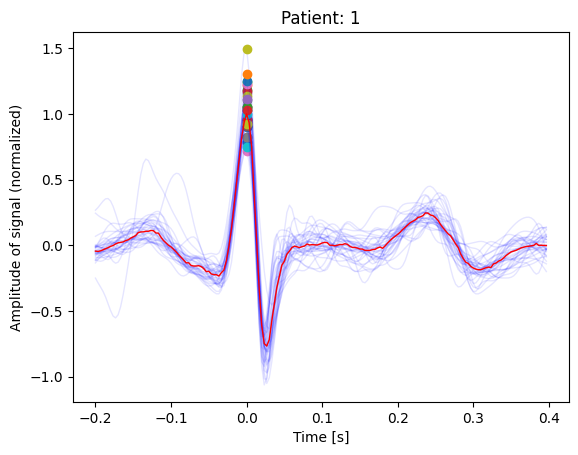

In [7]:
ts, signal, signal_flt, rpeaks, templates_ts, templates = pre_process(signal=signal, freq=freq)

r_id = int(-templates_ts[0]*freq)

for i in range(len(templates)):
    plt.plot(templates_ts, templates[i], 'b', alpha=0.1, lw=1)
    plt.plot(0, templates[i,r_id], 'o')
plt.plot(templates_ts, np.median(templates, axis=0), 'r', alpha=1, lw=1)

plt.title(f'Patient: {id}')
plt.xlabel('Time [s]')
plt.ylabel('Amplitude of signal (normalized)')
plt.show()

{0}


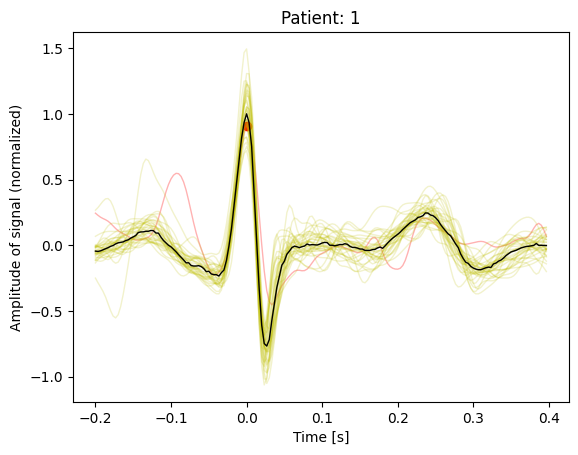

In [8]:
anom = check_R(rpeaks, templates_ts, templates)
print(anom)
for i in range(len(templates)):
    if i in anom :
        plt.plot(templates_ts, templates[i], 'r', alpha=0.3, lw=1)
        plt.plot(0, templates[i,r_id], 'or')
    else :
        plt.plot(templates_ts, templates[i], 'y', alpha=0.2, lw=1)
plt.plot(templates_ts, np.median(templates, axis=0), 'k', alpha=1, lw=1)

plt.title(f'Patient: {id}')
plt.xlabel('Time [s]')
plt.ylabel('Amplitude of signal (normalized)')
plt.show()

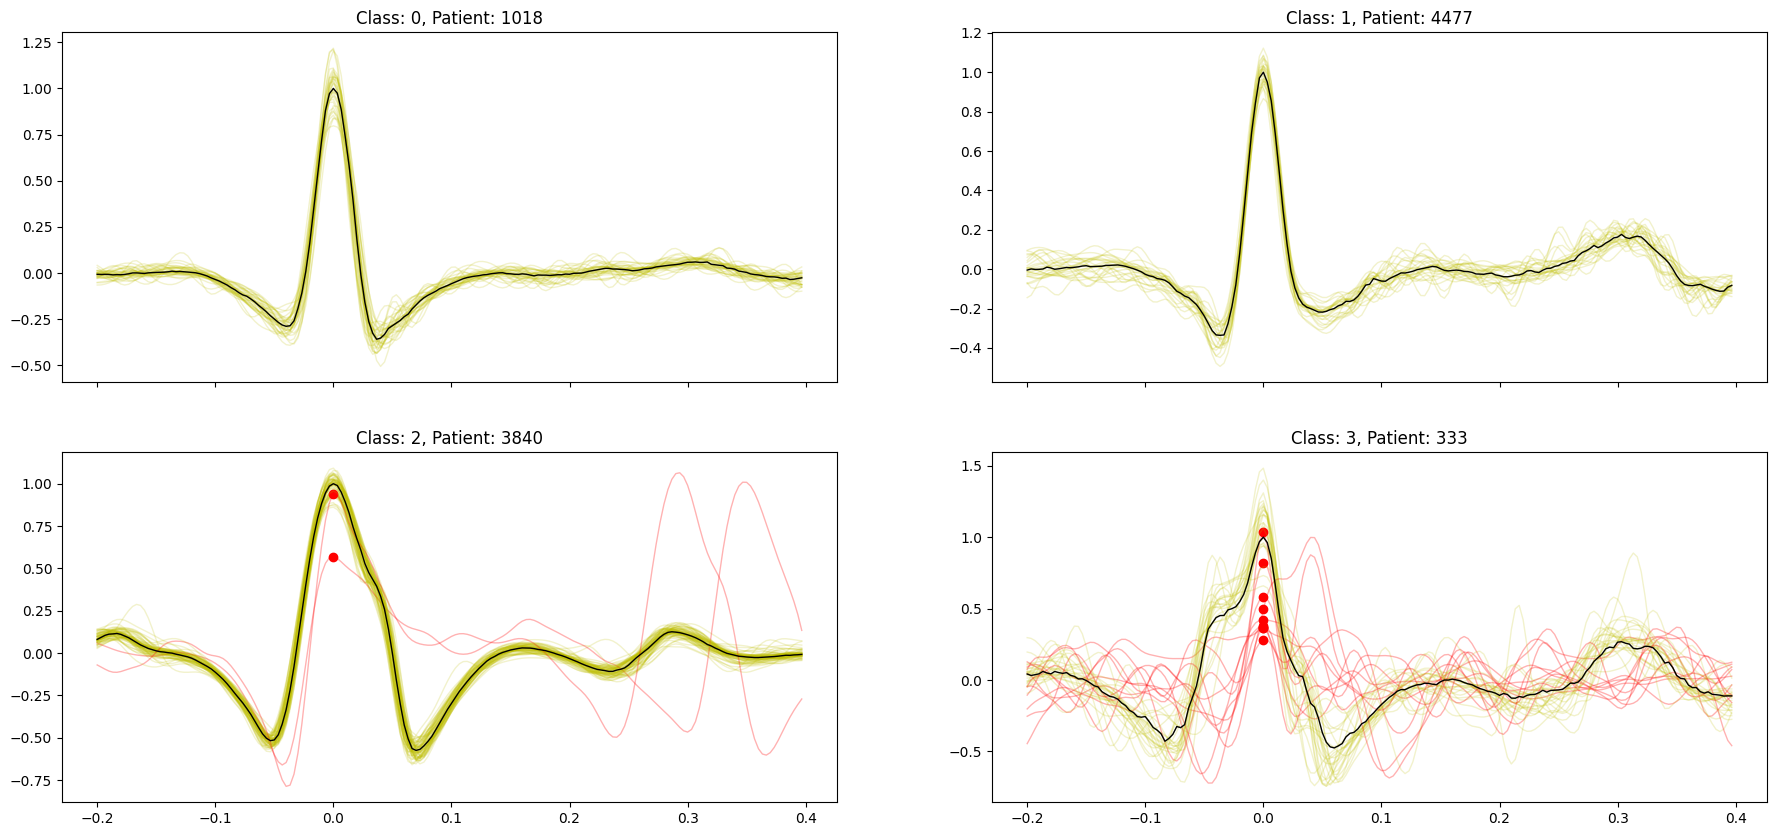

In [9]:
fig, axs = plt.subplots(2, 2, sharey=False, sharex=True, figsize=(22,10))
for i in range(4):
    id = np.random.choice(df_Y_train[df_Y_train["y"]==i].index) # random sample from class i
    signal = df_X_train.iloc[id,:].dropna()
    ts, signal, signal_flt, rpeaks, templates_ts, templates = pre_process(signal=signal, freq=freq)
    anom = check_R(rpeaks, templates_ts, templates)
    for k in range(len(templates)):
        if k in anom :
            axs[i//2,i%2].plot(templates_ts, templates[k], 'r', alpha=0.3, lw=1)
            axs[i//2,i%2].plot(0, templates[k,r_id], 'or')
        else :
            axs[i//2,i%2].plot(templates_ts, templates[k], 'y', alpha=0.2, lw=1)
    axs[i//2,i%2].plot(templates_ts, np.median(templates, axis=0), 'k', alpha=1, lw=1)
    axs[i//2,i%2].set_title(f'Class: {df_Y_train.loc[id,"y"]}, Patient: {id}')
plt.show()
